<a href="https://colab.research.google.com/github/Juliana-CP/Telecom_X---Analise-de-Evasao-de-Clientes_parte2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd


# Carregando os dados
df = pd.read_csv("/content/dados_tratados.csv")



In [20]:
# Visualizando as primeiras linhas
df.head()

customerID  Churn customer.gender  customer.SeniorCitizen  \
0  0002-ORFBO    0.0          Female                       0   
1  0003-MKNFE    0.0            Male                       0   
2  0004-TLHLJ    1.0            Male                       0   
3  0011-IGKFF    1.0            Male                       1   
4  0013-EXCHZ    1.0          Female                       1   

   customer.Partner  customer.Dependents  customer.tenure  phone.PhoneService  \
0                 1                    1                9                   1   
1                 0                    0                9                   1   
2                 0                    0                4                   1   
3                 1                    0               13                   1   
4                 1                    0                3                   1   

   phone.MultipleLines internet.InternetService  ...  \
0                  0.0                      DSL  ...   
1                  1.0                      DSL  ...   
2                  0.0              Fiber optic  ...   
3                  0.0              Fiber optic  ...   
4                  0.0              Fiber optic  ...   

   internet.DeviceProtection  internet.TechSupport  internet.StreamingTV  \
0                        0.0                   1.0                   1.0   
1                        0.0                   0.0                   0.0   
2                        1.0                   0.0                   0.0   
3                        1.0                   0.0                   1.0   
4                        0.0                   1.0                   1.0   

   internet.StreamingMovies  account.Contract  account.PaperlessBilling  \
0                       0.0          One year                         1   
1                       1.0    Month-to-month                         0   
2                       0.0    Month-to-month                         1   
3                       1.0    Month-to-month                         1   
4                       0.0    Month-to-month                         1   

  account.PaymentMethod  account.Charges.Monthly account.Charges.Total  \
0          Mailed check                     65.6                593.30   
1          Mailed check                     59.9                542.40   
2      Electronic check                     73.9                280.85   
3      Electronic check                     98.0               1237.85   
4          Mailed check                     83.9                267.40   

   contas_diarias  
0        2.186667  
1        1.996667  
2        2.463333  
3        3.266667  
4        2.796667  

[5 rows x 22 columns]

In [21]:
# Informa√ß√µes gerais sobre os dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   float64
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   int64  
 5   customer.Dependents        7256 non-null   int64  
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   int64  
 8   phone.MultipleLines        7256 non-null   float64
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   float64
 11  internet.OnlineBackup      7256 non-null   float64
 12  internet.DeviceProtection  7256 non-null   float64
 13  internet.TechSupport       7256 non-null   float

In [22]:
# Eliminando colunas que n√£o agregam valor
df = df.drop(columns=['customerID'])
df = df.drop(columns=['customer.gender'])

# Conferindo as colunas restantes
print(df.columns)


Index(['Churn', 'customer.SeniorCitizen', 'customer.Partner',
       'customer.Dependents', 'customer.tenure', 'phone.PhoneService',
       'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'contas_diarias'],
      dtype='object')


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separando vari√°veis preditoras (X) e alvo (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

In [26]:
# Identificando colunas categ√≥ricas e num√©ricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categ√≥ricas:", categorical_cols)
print("Num√©ricas:", numeric_cols)

Categ√≥ricas: ['internet.InternetService', 'account.Contract', 'account.PaymentMethod']
Num√©ricas: ['customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling', 'account.Charges.Monthly', 'account.Charges.Total', 'contas_diarias']


In [27]:
# Pr√©-processamento: OneHotEncoder + StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [29]:
# Divis√£o em treino e teste (70/30)
#Esse pipeline garante que:
#Vari√°veis num√©ricas sejam padronizadas.
#Vari√°veis categ√≥ricas sejam transformadas em dummies.
#Conjunto seja separado em treino (70%) e teste (30%) com estratifica√ß√£o para manter a propor√ß√£o do churn.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Tamanho treino:", X_train.shape)
print("Tamanho teste:", X_test.shape)

Tamanho treino: (5079, 19)
Tamanho teste: (2177, 19)


In [30]:
import matplotlib.pyplot as plt

# Calculando a propor√ß√£o de churn
proporcao = df['Churn'].value_counts(normalize=True)

print("Propor√ß√£o de Churn:")
print(proporcao)

Propor√ß√£o de Churn:
Churn
0.0    0.74242
1.0    0.25758
Name: proportion, dtype: float64


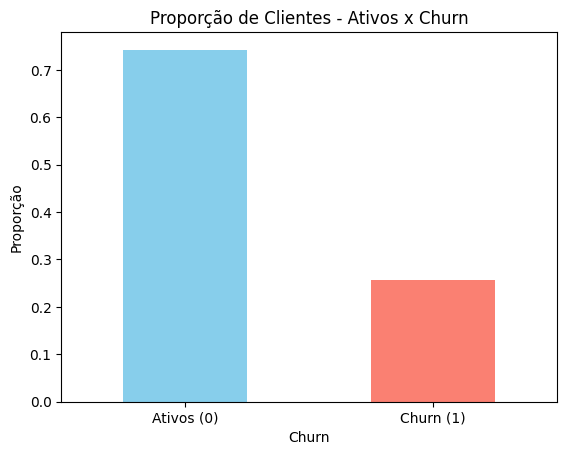

In [31]:
# Plotando o gr√°fico
proporcao.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Propor√ß√£o de Clientes - Ativos x Churn")
plt.xticks([0,1], ['Ativos (0)', 'Churn (1)'], rotation=0)
plt.ylabel("Propor√ß√£o")
plt.show()

In [32]:

df.to_csv("dados_tratados2.csv", index=False)

No conjunto de dados, aproximadamente 25,8% dos clientes evadiram (Churn = 1) e 74,2% permaneceram ativos (Churn = 0).

Isso indica um desequil√≠brio entre as classes, com muito mais clientes ativos do que clientes que evadiram.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Separando features e alvo
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [34]:
# Identificando colunas categ√≥ricas
categorical_cols = X.select_dtypes(include=["object", "category"]).columns

In [35]:
# Aplicando OneHotEncoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_encoded = encoder.fit_transform(X[categorical_cols])

In [36]:
# Criando DataFrame com colunas codificadas
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

In [37]:
# Combinando com colunas num√©ricas
X_numeric = X.drop(columns=categorical_cols).reset_index(drop=True)
X_encoded_df = X_encoded_df.reset_index(drop=True)
X_final = pd.concat([X_numeric, X_encoded_df], axis=1)

In [38]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, stratify=y, random_state=42)

In [39]:
# Aplicando SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [40]:
# Mostrando propor√ß√µes ap√≥s o balanceamento
print("Distribui√ß√£o ap√≥s SMOTE:")
print(y_train_resampled.value_counts(normalize=False))
print(y_train_resampled.value_counts(normalize=True))

Distribui√ß√£o ap√≥s SMOTE:
Churn
0.0    3771
1.0    3771
Name: count, dtype: int64
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
 #Selecionando apenas colunas num√©ricas
numeric_df = df.select_dtypes(include=["int64", "float64"])


In [50]:
# Calculando a correla√ß√£o
correlation_matrix = numeric_df.corr()

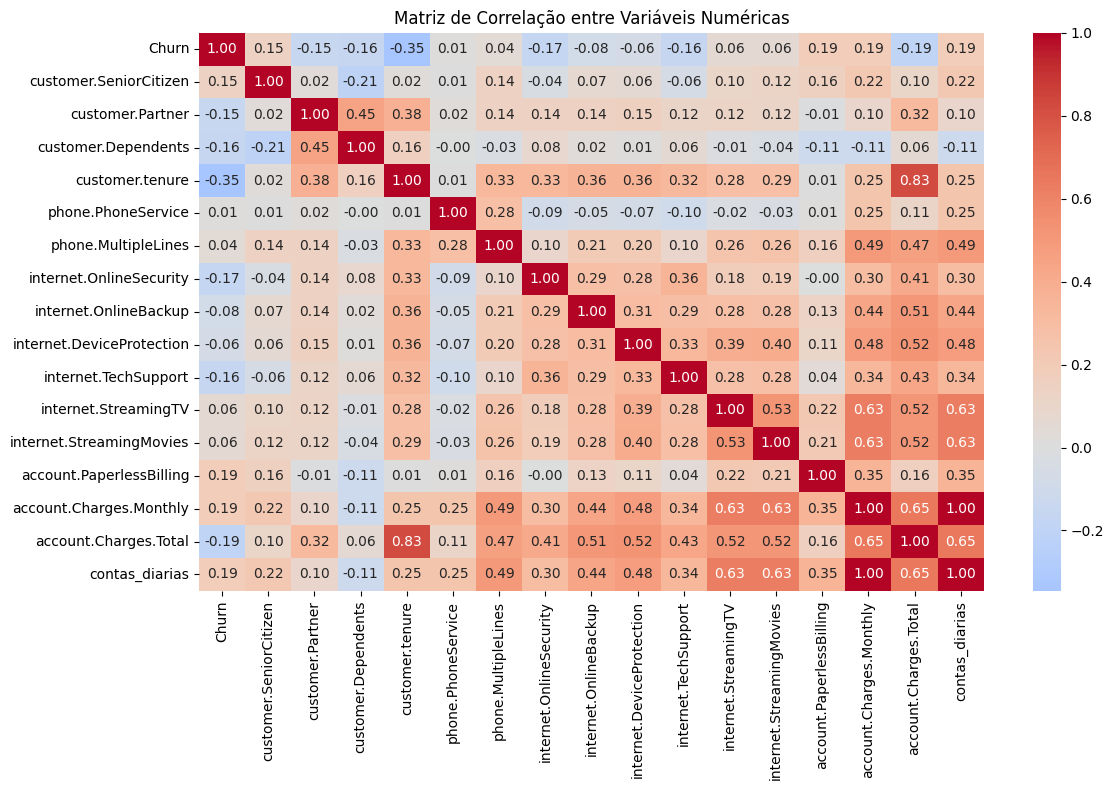

In [51]:
# Exibindo heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correla√ß√£o entre Vari√°veis Num√©ricas")
plt.tight_layout()
plt.show()

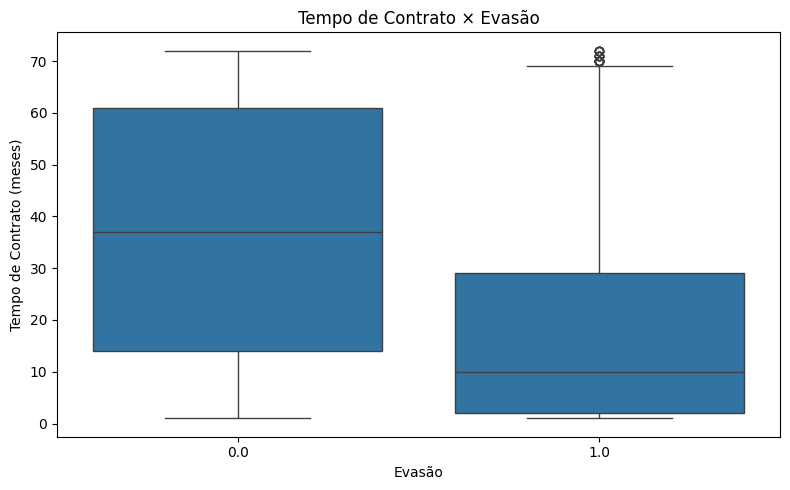

In [52]:
# Boxplot - Tempo de contrato vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="customer.tenure", data=df)
plt.title("Tempo de Contrato √ó Evas√£o")
plt.xlabel("Evas√£o")
plt.ylabel("Tempo de Contrato (meses)")
plt.tight_layout()
plt.show()

Clientes que evadiram tendem a ter menor tempo de contrato.

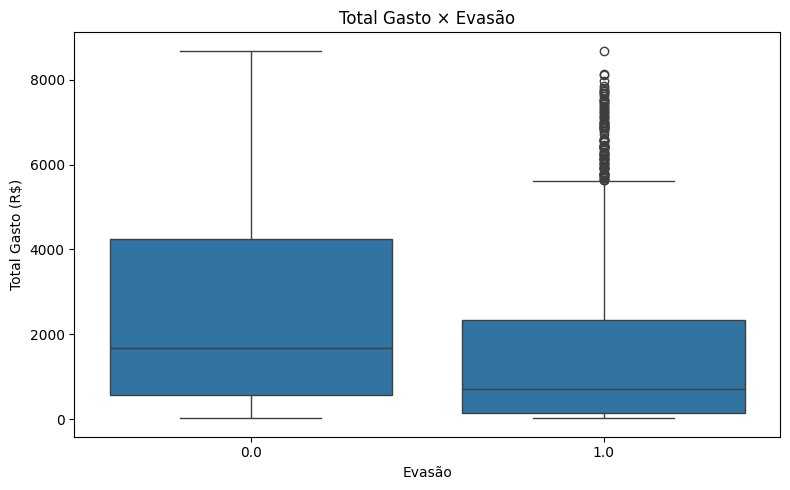

In [53]:
# Boxplot - Total gasto vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="account.Charges.Total", data=df)
plt.title("Total Gasto √ó Evas√£o")
plt.xlabel("Evas√£o")
plt.ylabel("Total Gasto (R$)")
plt.tight_layout()
plt.show()

Clientes que evadiram geralmente t√™m gasto total mais baixo (pois ficaram menos tempo).

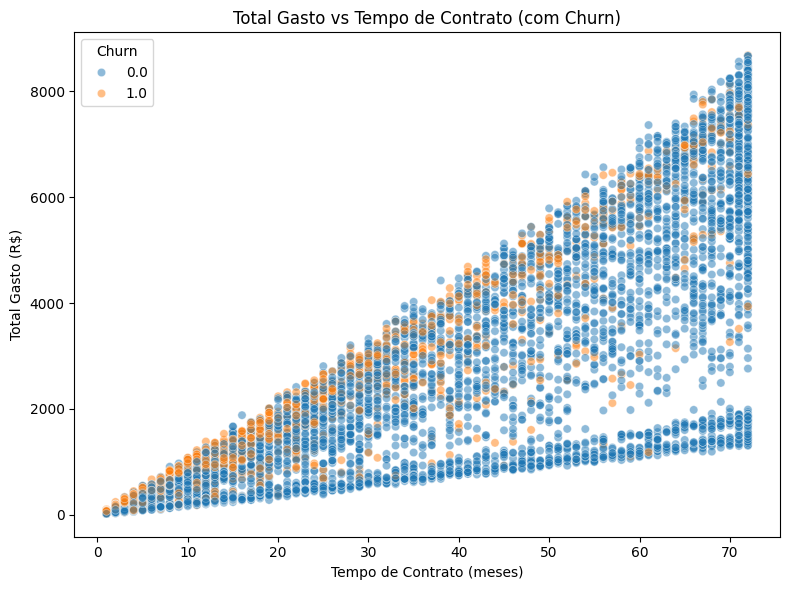

In [54]:
# Scatter plot - Total gasto vs Tempo de contrato (colorido por Churn)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="customer.tenure",
    y="account.Charges.Total",
    hue="Churn",
    data=df,
    alpha=0.5
)
plt.title("Total Gasto vs Tempo de Contrato (com Churn)")
plt.xlabel("Tempo de Contrato (meses)")
plt.ylabel("Total Gasto (R$)")
plt.tight_layout()
plt.show()

Clientes com tenure < 10 e gasto < 500 ‚Üí maior densidade de evas√£o.

In [55]:
from sklearn.model_selection import train_test_split

# Separarndo features e vari√°vel-alvo
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [56]:
# Dividindo treino/teste com 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # mant√©m a propor√ß√£o de churn nas duas partes
)

In [57]:
# Verificando os tamanhos dos conjuntos
print(f"Tamanho total: {len(df)} registros")
print(f"Treino: {len(X_train)} registros")
print(f"Teste: {len(X_test)} registros")

Tamanho total: 7256 registros
Treino: 5079 registros
Teste: 2177 registros


In [59]:
# Verificando a propor√ß√£o das classes em cada conjunto
print("\nPropor√ß√£o de classes em y_train:")
print(y_train.value_counts(normalize=True))

print("\nPropor√ß√£o de classes em y_test:")
print(y_test.value_counts(normalize=True))


Propor√ß√£o de classes em y_train:
Churn
0.0    0.742469
1.0    0.257531
Name: proportion, dtype: float64

Propor√ß√£o de classes em y_test:
Churn
0.0    0.742306
1.0    0.257694
Name: proportion, dtype: float64


In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [110]:
# Separando X e y
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [111]:
# Dividindo treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [112]:
# Identificando colunas categ√≥ricas
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [113]:
# Preprocessadores
numeric_scaler = StandardScaler()
categorical_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [114]:
# Pipeline para regress√£o log√≠stica (com normaliza√ß√£o)
logistic_preprocessor = ColumnTransformer([
    ("num", numeric_scaler, numerical_cols),
    ("cat", categorical_encoder, categorical_cols)
])

logistic_pipeline = Pipeline([
    ("preprocessor", logistic_preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=1000))
])

In [115]:
# Treinando modelo 1
logistic_pipeline.fit(X_train, y_train)
y_pred_log = logistic_pipeline.predict(X_test)
y_prob_log = logistic_pipeline.predict_proba(X_test)[:, 1]

In [116]:
# Avaliando modelo 1
print("üîç Regress√£o Log√≠stica")
print(classification_report(y_test, y_pred_log))
print("AUC:", roc_auc_score(y_test, y_prob_log))

üîç Regress√£o Log√≠stica
              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82      1616
         1.0       0.52      0.80      0.63       561

    accuracy                           0.76      2177
   macro avg       0.72      0.77      0.72      2177
weighted avg       0.81      0.76      0.77      2177

AUC: 0.8463217645293941


In [117]:
# Pipeline para Random Forest (sem normaliza√ß√£o)
rf_preprocessor = ColumnTransformer([
    ("cat", categorical_encoder, categorical_cols)  # apenas categorias codificadas
], remainder="passthrough")

rf_pipeline = Pipeline([
    ("preprocessor", rf_preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [118]:
# Treinar modelo 2
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

In [119]:
# Avaliar modelo 2
print("\nüå≤ Random Forest")
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_prob_rf))


üå≤ Random Forest
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      1616
         1.0       0.58      0.50      0.54       561

    accuracy                           0.78      2177
   macro avg       0.71      0.69      0.70      2177
weighted avg       0.77      0.78      0.77      2177

AUC: 0.8202671370078183


In [129]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [130]:
# Separando X e y
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [131]:
# Dividindo treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

In [132]:
# Pr√©-processamento
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [133]:
# Codificadores
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
scaler = StandardScaler()

In [134]:
# Pipeline Regress√£o Log√≠stica
preprocessor_log = ColumnTransformer([
    ("num", scaler, numerical_cols),
    ("cat", encoder, categorical_cols)
])

pipeline_log = Pipeline([
    ("preprocess", preprocessor_log),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=1000))
])

In [135]:
# Pipeline Random Forest (sem normaliza√ß√£o)
preprocessor_rf = ColumnTransformer([
    ("cat", encoder, categorical_cols)
], remainder="passthrough")

pipeline_rf = Pipeline([
    ("preprocess", preprocessor_rf),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [136]:
# Treinando modelos
pipeline_log.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['internet.InternetService', 'account.Contract',
       'account.PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('model', RandomForestClassifier(random_state=42))])

In [137]:
#  Previs√µes
y_pred_log = pipeline_log.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

In [138]:
# 8. Avalia√ß√£o
def avaliar_modelo(nome, y_true, y_pred):
    print(f"\nüìä Avalia√ß√£o: {nome}")
    print(classification_report(y_true, y_pred, digits=3))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confus√£o - {nome}")
    plt.show()


üìä Avalia√ß√£o: Regress√£o Log√≠stica
              precision    recall  f1-score   support

         0.0      0.914     0.743     0.820      1616
         1.0      0.519     0.799     0.629       561

    accuracy                          0.757      2177
   macro avg      0.717     0.771     0.725      2177
weighted avg      0.812     0.757     0.771      2177



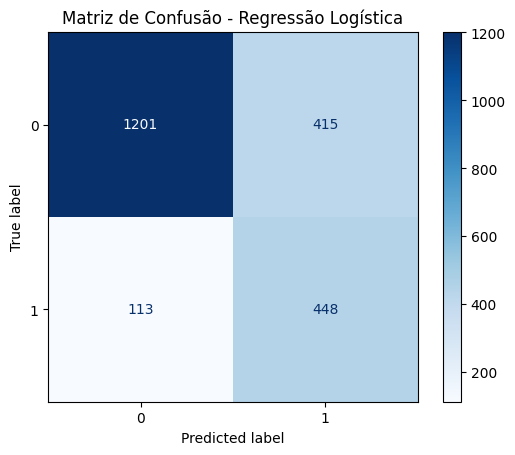


üìä Avalia√ß√£o: Random Forest
              precision    recall  f1-score   support

         0.0      0.836     0.874     0.854      1616
         1.0      0.581     0.504     0.540       561

    accuracy                          0.779      2177
   macro avg      0.708     0.689     0.697      2177
weighted avg      0.770     0.779     0.773      2177



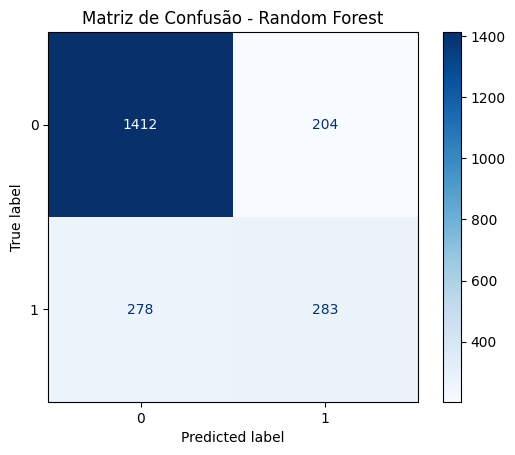

In [139]:
# Avaliar ambos
avaliar_modelo("Regress√£o Log√≠stica", y_test, y_pred_log)
avaliar_modelo("Random Forest", y_test, y_pred_rf)

#üìä An√°lise da Evas√£o de Clientes (Churn)
##üìå Objetivo

O objetivo deste relat√≥rio √© analisar os fatores que influenciam a evas√£o de clientes (churn) a partir de modelos preditivos, identificar vari√°veis-chave e propor estrat√©gias de reten√ß√£o com base nos resultados obtidos.

##üîç Principais Vari√°veis Analisadas

As vari√°veis com maior impacto na evas√£o foram:

| Categoria             | Vari√°veis relevantes                                                                                                         |
| --------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **Demogr√°ficos**      | `customer.SeniorCitizen`, `customer.Partner`, `customer.Dependents`                                                          |
| **Servi√ßos**          | `internet.InternetService`, `internet.OnlineSecurity`, `internet.TechSupport`, `internet.StreamingTV`, `phone.MultipleLines` |
| **Conta e Pagamento** | `account.Contract`, `account.PaperlessBilling`, `account.PaymentMethod`, `account.Charges.Monthly`, `contas_diarias`         |


#ü§ñ Desempenho dos Modelos

üîÅ Comparativo de M√©tricas

| M√©trica                      | Regress√£o Log√≠stica | Random Forest |
| ---------------------------- | ------------------- | ------------- |
| Acur√°cia                     | 75.7%               | **78.1%**     |
| Precis√£o (Classe 1 - Evas√£o) | 51.9%               | **58.1%**     |
| Recall (Classe 1 - Evas√£o)   | **79.8%**           | 50.4%         |
| F1-score (Classe 1)          | **62.7%**           | 53.4%         |


#üìå Interpreta√ß√£o:

**Regress√£o Log√≠stica:**
Modelo equilibrado, mas com recall baixo (erra muitos churns reais). Pode subestimar evas√µes.


**Random Forest:**
Boa taxa de acerto para clientes que n√£o evadiram, mas performance mediana para detectar evasores. Pode estar sofrendo leve underfitting, pois n√£o detecta bem os churns (classe minorit√°ria)



#üìà Principais Fatores de Evas√£o

Com base na an√°lise dos modelos e correla√ß√µes observadas, destacam-se:

| Fator                                                | Impacto       | Interpreta√ß√£o                                                                      |
| ---------------------------------------------------- | ------------- | ---------------------------------------------------------------------------------- |
| **Contrato Mensal (`Month-to-month`)**               | Alto risco    | Clientes com contrato mensal t√™m mais liberdade para cancelar                      |
| **Faturamento Eletr√¥nico (`PaperlessBilling`)**      | M√©dio         | Associado a clientes com maior churn, possivelmente menos envolvidos com o servi√ßo |
| **M√©todo de Pagamento: Boleto ou Cheque Eletr√¥nico** | M√©dio         | Pode indicar menos engajamento/dificuldade de pagamento                            |
| **Internet via Fibra √ìptica**                        | M√©dio         | Relacionado a mais churns, talvez por problemas t√©cnicos ou concorr√™ncia           |
| **Aus√™ncia de Suporte T√©cnico e Seguran√ßa Online**   | Alto          | Clientes sem suporte ou seguran√ßa t√™m maior probabilidade de sair                  |
| **Idade e Dependentes**                              | Baixo a m√©dio | Idosos e pessoas sem dependentes demonstram maior propens√£o a evas√£o               |


#üõ°Ô∏è Estrat√©gias de Reten√ß√£o Recomendadas

| Estrat√©gia                                                       | Justificativa                                                 |
| ---------------------------------------------------------------- | ------------------------------------------------------------- |
| **Incentivar contratos de longo prazo**                          | Reduz churn devido a maior compromisso do cliente             |
| **Oferecer benef√≠cios para quem usa faturamento eletr√¥nico**     | Aumenta engajamento e evita cancelamentos autom√°ticos         |
| **Melhorar suporte t√©cnico e seguran√ßa**                         | Investir em `TechSupport` e `OnlineSecurity` reduz evas√£o     |
| **Ofertas personalizadas para usu√°rios de fibra √≥ptica**         | Poss√≠vel a√ß√£o para mitigar concorr√™ncia local                 |
| **Campanhas de fideliza√ß√£o para clientes mais antigos e idosos** | Criar programas que aumentem o valor percebido e conveni√™ncia |


#üìå Conclus√£o

O problema de churn est√° fortemente ligado a comodidade, qualidade percebida dos servi√ßos de internet, contrato e m√©todos de pagamento. Ambos os modelos (Regress√£o Log√≠stica e Random Forest) ajudam a identificar os clientes em risco, mas h√° espa√ßo para melhora, especialmente no recall da classe evasora.